# Lab 8.1 SVD with Monthly Precipitation

Derived from svd_tutorial.m (data decomposition tutorial using SVD in MATLAB)

by Brian Henn, UW, October 2013. Updated by Jessica Lundquist, October 2014. Converted to python by Steven Pestana, November 2019

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio 
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt

from numpy.linalg import svd

%matplotlib inline

#### Read in PRISM file

In [2]:
data = sio.loadmat('PRISM_4km_1982-2012.mat')

In [3]:
# Inspect the dictionary keys
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Zs', 'dates', 'xs', 'ys', 'Xs', 'Ys', 'ppt_mean', 'ppt', 'map_index', 'ny', 'nx', 'nm', 'n', 'ppt_stdev'])


Unpack the mat file into numpy arrays, format dates to python datetimes following the method outlined [here](https://sociograph.blogspot.com/2011/04/how-to-avoid-gotcha-when-converting.html).

In [4]:
# convert matlab format dates to python datetimes
datenums = data['dates'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=int(d)%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
Zs = data['Zs'] #elevation
xs = data['xs'] # x coordinate
ys = data['ys'] # y coordinate
Xs = data['Xs'] # longitude on a grid
Ys = data['Ys'] # latitude on a grid
ppt_mean = data['ppt_mean']
ppt = data['ppt']
map_index = data['map_index'][:,0] - 1 # map indices need to be shifted by -1 for numpy arrays
ny = data['ny'][0][0] #size in the y dimension
nx = data['nx'][0][0] # size in the x dimension
nm = data['nm'][0][0]
n = data['n'][0][0]
ppt_stdev = data['ppt_stdev']

**ppt_mean**: gridded array of average monthly rainfall (mm) (lat. x lon.)

**ppt_stdev**:  gridded array of the standard deviation in monthly rainfall by location (mm)

**map_index**: list of indices for rearranging 1D array into gridded data


#### Plot Elevation Data

Text(0, 0.5, 'latitude')

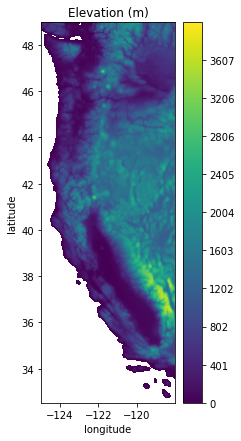

In [5]:
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,Zs, levels=np.linspace(0,4000,500))
plt.colorbar()
plt.title('Elevation (m)')
plt.xlabel('longitude')
plt.ylabel('latitude')

#### Plot Mean Precip. Data

Text(0, 0.5, 'latitude')

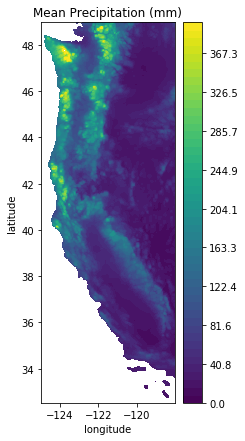

In [6]:
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,ppt_mean, levels=np.linspace(0,400,50))
plt.colorbar()
plt.title('Mean Precipitation (mm)');
plt.xlabel('longitude')
plt.ylabel('latitude')

#### Plot coefficient of variation data

Text(0, 0.5, 'latitude')

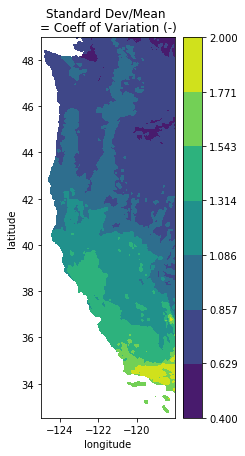

In [7]:
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,ppt_stdev/ppt_mean,levels=np.linspace(0.4,2,8))
plt.colorbar()
plt.title('Standard Dev/Mean \n= Coeff of Variation (-)');
plt.xlabel('longitude')
plt.ylabel('latitude')

#### Plot some monthly precipitation anomalies

In [8]:
print(dates[0])

1981-10-01 00:00:00


Text(0, 0.5, 'latitude')

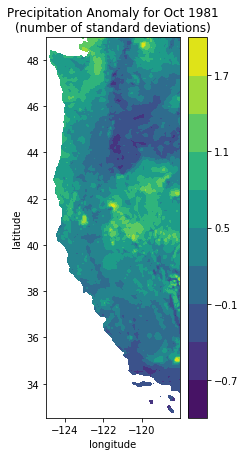

In [9]:
month = 0  #this index tells us which month in our timeseries we want to plot
 # from printing above, we can see this is October 1981
a = np.full(n, np.nan)
a[map_index] = ppt[:,month]
b = a.reshape([nx, ny]).T

plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,b,levels=np.linspace(-1,2, 11))
plt.colorbar()
plt.title('Precipitation Anomaly for Oct 1981\n(number of standard deviations)');
plt.xlabel('longitude')
plt.ylabel('latitude')

#### Decompose the entire dataset using SVD

In [10]:
[U,S,V] = svd(ppt,False)

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'weight')

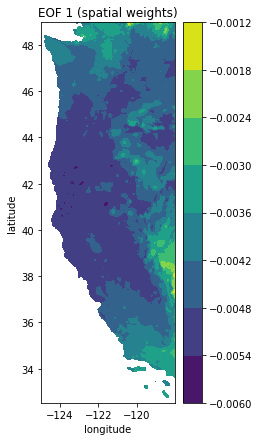

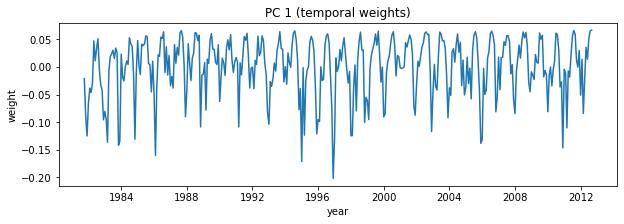

In [11]:
# plot first EOF
i = 0
a = np.full(n, np.nan)
a[map_index] = U[:,i]
b = a.reshape([nx, ny]).T

plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,b)
plt.colorbar()
plt.title('EOF 1 (spatial weights)');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot first PC
i=0
plt.figure(figsize=(10,3))
plt.plot(dates,V[i,:]);
plt.title('PC 1 (temporal weights)');
plt.xlabel('year')
plt.ylabel('weight')

Note that you can equivalently plot these each with a -1 multiplier sometimes that makes it easier to understand things

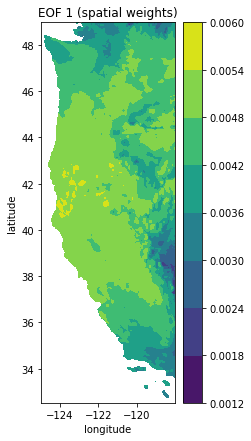

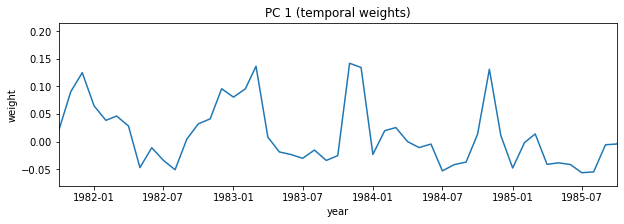

In [12]:
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,-1*b) # with -1 multiplier
plt.colorbar()
plt.title('EOF 1 (spatial weights)');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot first PC
# Note that I'm also going to zoom here so that it's easier to see how things change by month
# over just a few years
i=0
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])  # with -1 multiplier
plt.title('PC 1 (temporal weights)')
plt.xlabel('year')
plt.ylabel('weight')

plt.xlim((dates[0], dates[48]));

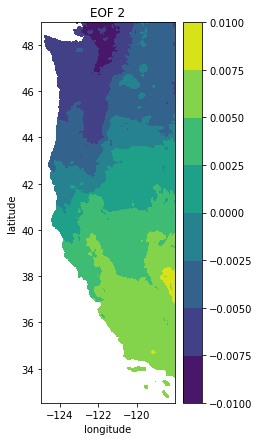

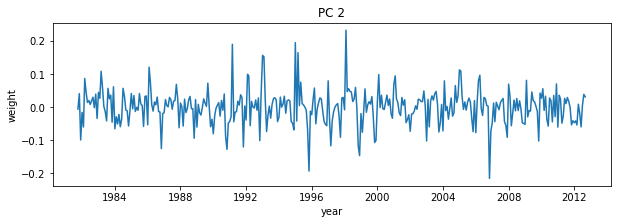

In [13]:
# plot second EOF
i = 1
a = np.full(n, np.nan)
a[map_index] = U[:,i]
b = a.reshape([nx, ny]).T

plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,-1*b)  # with -1 multiplier
plt.colorbar()
plt.title('EOF 2');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot second PC
i=1
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])   # with -1 multiplier
plt.title('PC 2')
plt.xlabel('year')
plt.ylabel('weight');

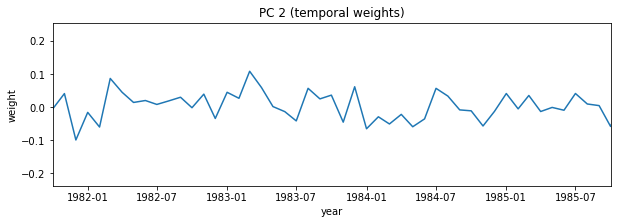

In [14]:
# Again, try zooming in to some specific dates on the PC
i = 1
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])  # with -1 multiplier
plt.title('PC 2 (temporal weights)')
plt.xlabel('year')
plt.ylabel('weight')

plt.xlim((dates[0], dates[48]));

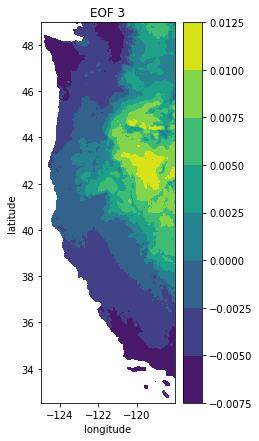

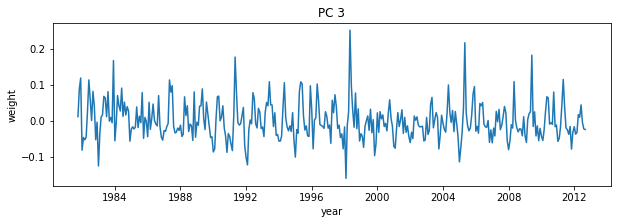

In [15]:
# plot third EOF
i = 2
a = np.full(n, np.nan)
a[map_index] = U[:,i]
b = a.reshape([nx, ny]).T

plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,-1*b)  # with -1 multiplier
plt.colorbar()
plt.title('EOF 3');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot third PC
i = 2
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])  # with -1 multiplier
plt.title('PC 3')
plt.xlabel('year')
plt.ylabel('weight');

#### SVD Variance Explained
Recall that S describes the variance explained by each pattern.

What fraction of the whole dataset is described by the first 10 patterns?

In [16]:
# SVD Variance Explained
var_exp = np.full(nm, np.nan);
for i in range(nm):
    var_exp[i] = S[i]/np.sum(S[:]);

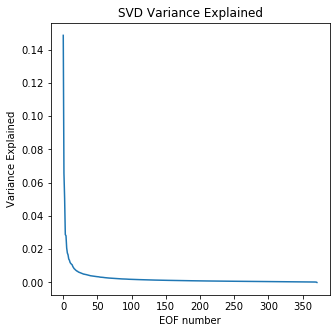

In [17]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained');

Set smaller ranges of axes limits to zoom in to the first 10 EOFs

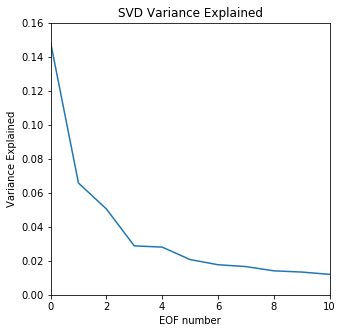

In [18]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained')
plt.ylim([0,0.16])
plt.xlim([0,10]);

#### Plot 10 leading EOFs
Note that because they are all plotted in close proximity, we will not put on all the axes labels.
In general, please always remember axes labels.

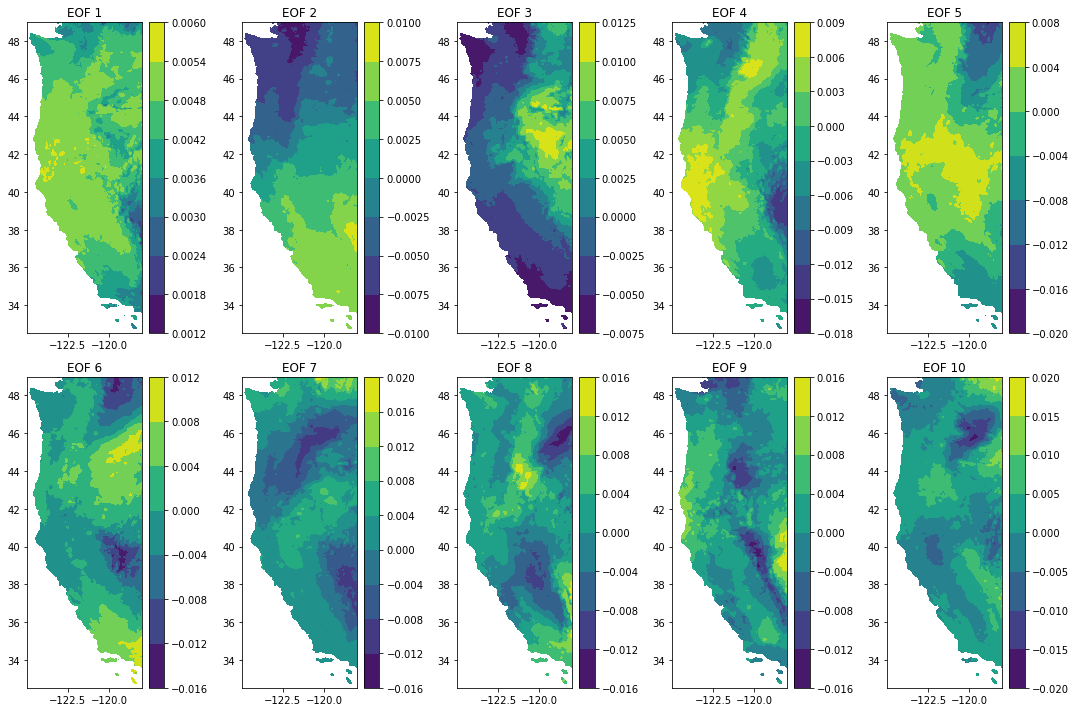

In [19]:
f, ax = plt.subplots(2,5,figsize=(15,10))
i = 0
for row in range(2):
    for column in range(5):    
      
        a = np.full(n, np.nan)
        a[map_index] = U[:,i]
        b = a.reshape([nx, ny]).T

        cf = ax[row,column].contourf(Xs,Ys,-1*b) # with -1 multiplier
        cbar = plt.colorbar(cf, ax=ax[row,column])
        ax[row,column].set_title('EOF {}'.format(i+1))
        i+=1

plt.tight_layout()

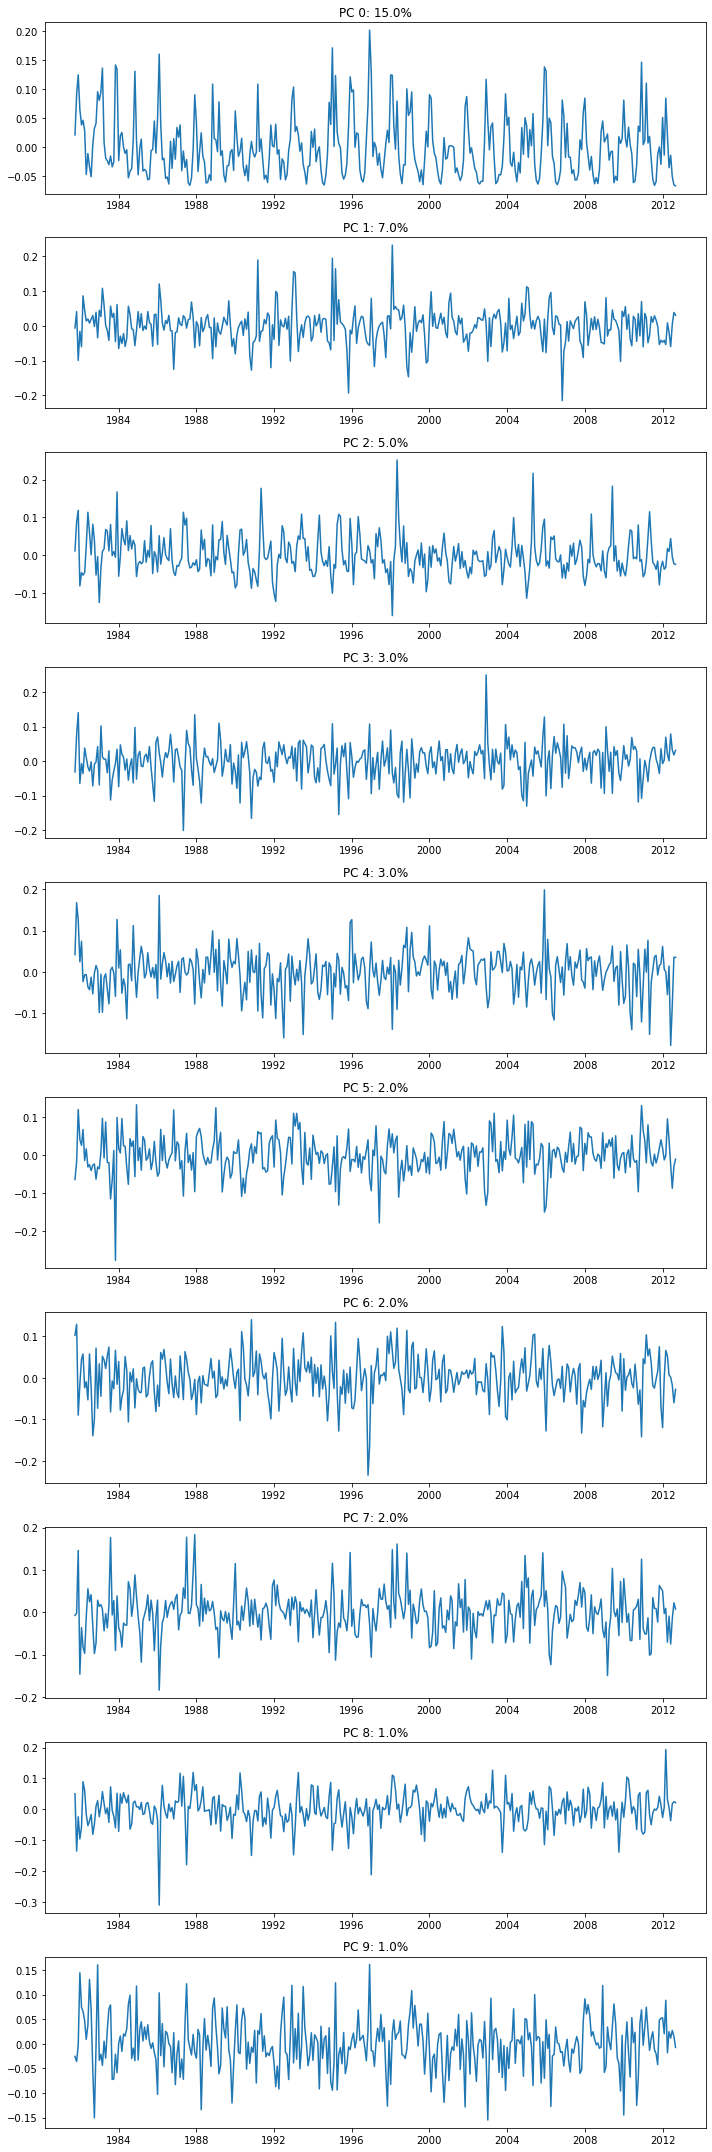

In [20]:
# Plot the 10 leading PCs
f, ax = plt.subplots(10,1,figsize=(10,30))
for i in range(10):
    ax[i].plot(dates,-1*V[i,:]); # with -1 multiplier
    ax[i].set_title('PC {}: {}%'.format(i,np.round(100*var_exp[i]),2));
plt.tight_layout()

#### Reconstructing Original Data

Reconstruct and plot October 1981 data with only 10 EOFs/PCs. We can reconstruct much of the original data
using only the first several patterns. This requires much less information than the original data itself.

See documentation and examples [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html).

In [21]:
# Select the first 10 to reconstruct the precip data
ppt_reconstructed = np.dot(U[:,:9] * S[:9], V[:9,:])

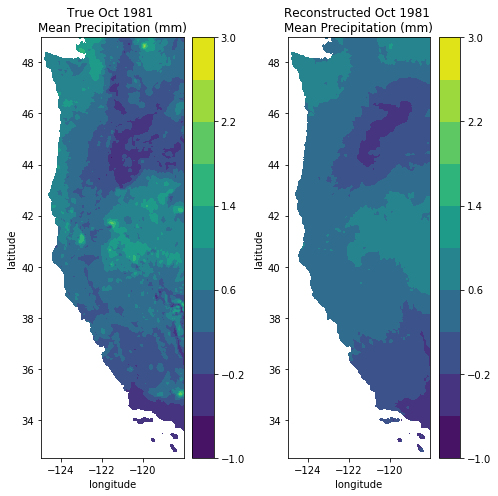

In [22]:
fig, ax = plt.subplots(1,2,figsize=(7,7))

month = 0

# Plot the original precip data
a = np.full(n, np.nan)
a[map_index] = ppt[:,month]
b = a.reshape([nx, ny]).T
cf = ax[0].contourf(Xs,Ys,b,levels=np.linspace(-1,3, 11))
cbar = plt.colorbar(cf, ax=ax[0])
ax[0].set_title('True Oct 1981 \nMean Precipitation (mm)');
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')

# Plot the reconstructed precip data
a = np.full(n, np.nan)
a[map_index] = ppt_reconstructed[:,month]
b = a.reshape([nx, ny]).T
ax[1].contourf(Xs,Ys,b,levels=np.linspace(-1,3, 11))
cbar = plt.colorbar(cf, ax=ax[1])
ax[1].set_title('Reconstructed Oct 1981 \nMean Precipitation (mm)');
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.tight_layout()